In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string

import re

import json

In [2]:
import nltk
nltk.download('words')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package words to /home/cdsw/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:

import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [23]:
def embed(input):
    return model(input)

In [4]:
words = set(nltk.corpus.words.words())

In [5]:
def df_lambda_detect_not_words(df, column_name, new_column):
    Lem = WordNetLemmatizer()
    df[new_column] = df[column_name].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if Lem.lemmatize(w.lower()) not in words))
    return df

In [6]:
def df_lambda_remove_punctuation(df, column_name, new_column):
    df[new_column] = df[column_name].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return df

In [7]:
def df_lambda_replace_characters(df, column_name, new_column, dictionary):
    df[new_column] = df[column_name].apply(lambda x: replace_words(x, dictionary))       
    return df


In [8]:
def replace_words(strtext, dictionary):
    pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in dictionary.keys()) + r')(?!\w)')
    result = pattern.sub(lambda x: dictionary[x.group()], strtext)
    return result

In [10]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state
column = 'clean_publicremarks'

noun_sentence_df = pd.read_feather('noun_sentences/' + file + '_withembeddings_erros_' + column + '_nounsentences_sentence_embedding.fea')



In [9]:
with open("replacement_dictionary_ordered.json") as json_file:
    replacement_dictionary_2 = json.load(json_file)



In [27]:
replacement_dictionary_2

{'lakedigit poolsdigit courtsgolf courseclub houseparksplaygrounds': 'lake pools courts golf course club housepark playgrounds',
 'digitdigitdigitdigit digitdigitdigitdigit': 'digitdigitdigitdigit digitdigitdigitdigit',
 'digitdigitdigitdigitdigitdigitdigitdigit': 'digitdigitdigitdigitdigitdigitdigitdigit',
 'digitnumberdigitdigitdigitdigit digitpm': 'digitnumberdigitdigitdigitdigit digitpm',
 'digitpm digitnumberdigitdigitdigitdigit': 'number number',
 'digitdigitdigitk digitdigitdigitdigit': 'number number',
 'digitdigitdigitdigit digitdigitdigitk': 'number number',
 'digitdigitdigitdigitdigitdigitdigit': 'number number number',
 'digitdigitth digitdigitdigitdigit': 'digitdigitth digitdigitdigitdigit',
 'digitdigitdigitk digitdigitdigitk': 'number number',
 'digitbeddigitdigitbath digitstory': 'digitbeddigitdigitbath digitstory',
 'digitdigitdigits digitdigitdigits': 'number number',
 'digitdigitk digitdigitdigitdigit': 'number number',
 'digitdigitxdigitdigitxdigitdigit': 'number nu

In [28]:
noun_sentence_df_20 = noun_sentence_df[noun_sentence_df['count']>20]

In [29]:
noun_sentence_df_20 = df_lambda_remove_punctuation(noun_sentence_df_20, 'noun_sentence', 'noun_sentence_no_punct')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
noun_sentence_df_20 = df_lambda_replace_characters(noun_sentence_df_20,  'noun_sentence_no_punct', 
                                                   'noun_sentence_corrections', replacement_dictionary_2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
noun_sentence_df_20 = df_lambda_detect_not_words(noun_sentence_df_20, 'noun_sentence_corrections', 'not_words')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
noun_sentence_df_20

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,Listing_Error_Indicators,noun_sentence_embeddings,noun_sentence_vaderpolarity,noun_sentence_no_punct,noun_sentence_corrections,not_words
63607,studs renovation,31,9.744215,"[0.4103665640631011, 0.41728319999999997, 0.49...",-0.735297,"[0.0, 0.00028571428571428574, 0.06693333333333...","[197894660, 250604412, 249157137, 222400238, 2...",0.314330,-0.023719,"[0.31432952538041775, 0.04068285195361636, -0....","[-0.02371925683439437, 0.0020194508549551816, ...","[0.052691612, 0.03693112, -0.049397767, -0.008...","[0.0, 1.0, 0.0, 0.0]",studs renovation,studs renovation,
83996,shower surrounds,28,7.905244,"[0.4387752777777778, 0.17622340350877197, 0.27...",-1.544048,"[-0.055, -0.08421052631578947, -0.019078947368...","[132872201, 6731906, 4232620, 5329671, 1258112...",0.282330,-0.055145,"[0.28233013942341034, 0.0424224129690018, -0.4...","[-0.05514457781159121, 0.0024243273137415197, ...","[-0.014650434, 0.07090296, 0.0504117, 0.011439...","[0.0, 1.0, 0.0, 0.0]",shower surrounds,shower surrounds,
92676,lee+white development,28,7.584127,"[0.44474872174879587, 0.5014364032697548, 0.09...",-2.173541,"[0.0, -0.00790190735694823, -0.029117647058823...","[211308616, 127087241, 133213133, 171564991, 1...",0.270862,-0.077626,"[0.2708616696841231, 0.06026944254415941, -0.7...","[-0.07762644975555874, 0.01239395576734469, -2...","[0.04612677, 0.00079587736, 0.043401964, -0.04...","[0.0, 1.0, 0.0, 0.0]",leewhite development,leewhite development,leewhite
113989,monday night brewery,21,5.171616,"[-0.02238924855491331, 0.5014364032697548, -0....",-0.625781,"[-0.06907514450867051, -0.00790190735694823, 0...","[200858826, 127087241, 172189751, 133213133, 1...",0.246267,-0.029799,"[0.2462674300702824, 0.09033614418445898, -1.5...","[-0.029799101674654667, 0.004036221684828119, ...","[0.060026523, -0.031776395, -0.07081793, -0.06...","[0.0, 1.0, 0.0, 0.0]",monday night brewery,monday night brewery,monday
116777,gorgeous bungalow,24,5.846151,"[0.06999810457516331, 0.4551995135135135, 0.29...",-0.840031,"[0.05555555555555555, -0.08054054054054054, -0...","[142728061, 210231641, 209961967, 152933557, 1...",0.243590,-0.035001,"[0.24358962556385214, 0.045847676984274735, -0...","[-0.035001307484190024, 0.006301288135261846, ...","[-0.020439927, -0.02788046, -0.017497879, 0.00...","[0.0, 0.2, 0.8, 0.6124]",gorgeous bungalow,gorgeous bungalow,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825189,utilities inspections,106,-52.553157,"[0.011213698630137103, -0.44224117647058825, 0...",-0.803344,"[0.043835616438356165, -0.20452488687782805, -...","[132883912, 4158664, 3640049, 140201011, 13941...",-0.495785,-0.007579,"[-0.4957845039683316, 0.2072645364563917, -0.0...","[-0.00757871387996991, 0.03244321830158484, -0...","[-0.011067669, -0.0022810258, 0.023981124, -0....","[0.0, 1.0, 0.0, 0.0]",utilities inspections,utilities inspections,
1825484,available inspections,25,-12.459462,"[-0.7051311666666666, -0.16786450000000008, -0...",0.214399,"[0.0016666666666666668, 0.125, 0.0, -0.149, 0....","[150636167, 173343008, 176532508, 187777456, 2...",-0.498378,0.008576,"[-0.4983784993571633, 0.08701769936855712, 0.2...","[0.008575964698432173, 0.019177693420631702, -...","[-0.029419353, 0.009323144, 0.0018775914, 0.05...","[0.0, 1.0, 0.0, 0.0]",available inspections,available inspections,
1826737,good potential,46,-23.538884,"[0.2837384191176471, -0.5405605, -0.3893973288...",-3.272146,"[-0.05606617647058824, -0.165, 0.0, -0.2153846...","[127085835, 171628048, 140951488, 180510904, 1...",-0.511715,-0.071134,"[-0.5117148606561, 0.1808759281132834, -0.3305...","[-0.0711336047468601, 0.026612259664944012, -0...","[0.006121108, -0.09186122, -0.049228374, -0.04...","[0.0, 0.256, 0.744, 0.4404]",good potential,good potential,
1830384,super corporate value,21,-11.603720,"[0.2306381481481481, -0.3187421

In [33]:
columns = ['noun_sentence_corrections']

In [36]:
import time
for column in columns:
    print(column)
    tic = time.time()
    new_column = column + '_embeddings'
    noun_sentence_df_20[new_column] = noun_sentence_df_20[column].apply(lambda x: embed([x]).numpy()[0]) 
    toc = time.time()
    print(toc - tic)

noun_sentence_corrections
154.6714060306549


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
noun_sentence_df_20

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,Listing_Error_Indicators,noun_sentence_embeddings,noun_sentence_vaderpolarity,noun_sentence_no_punct,noun_sentence_corrections,not_words,noun_sentence_corrections_embeddings
63607,studs renovation,31,9.744215,"[0.4103665640631011, 0.41728319999999997, 0.49...",-0.735297,"[0.0, 0.00028571428571428574, 0.06693333333333...","[197894660, 250604412, 249157137, 222400238, 2...",0.314330,-0.023719,"[0.31432952538041775, 0.04068285195361636, -0....","[-0.02371925683439437, 0.0020194508549551816, ...","[0.052691612, 0.03693112, -0.049397767, -0.008...","[0.0, 1.0, 0.0, 0.0]",studs renovation,studs renovation,,"[0.052691612, 0.03693112, -0.049397767, -0.008..."
83996,shower surrounds,28,7.905244,"[0.4387752777777778, 0.17622340350877197, 0.27...",-1.544048,"[-0.055, -0.08421052631578947, -0.019078947368...","[132872201, 6731906, 4232620, 5329671, 1258112...",0.282330,-0.055145,"[0.28233013942341034, 0.0424224129690018, -0.4...","[-0.05514457781159121, 0.0024243273137415197, ...","[-0.014650434, 0.07090296, 0.0504117, 0.011439...","[0.0, 1.0, 0.0, 0.0]",shower surrounds,shower surrounds,,"[-0.014650434, 0.07090296, 0.0504117, 0.011439..."
92676,lee+white development,28,7.584127,"[0.44474872174879587, 0.5014364032697548, 0.09...",-2.173541,"[0.0, -0.00790190735694823, -0.029117647058823...","[211308616, 127087241, 133213133, 171564991, 1...",0.270862,-0.077626,"[0.2708616696841231, 0.06026944254415941, -0.7...","[-0.07762644975555874, 0.01239395576734469, -2...","[0.04612677, 0.00079587736, 0.043401964, -0.04...","[0.0, 1.0, 0.0, 0.0]",leewhite development,leewhite development,leewhite,"[0.03309278, 0.021012176, 0.017111761, -0.0294..."
113989,monday night brewery,21,5.171616,"[-0.02238924855491331, 0.5014364032697548, -0....",-0.625781,"[-0.06907514450867051, -0.00790190735694823, 0...","[200858826, 127087241, 172189751, 133213133, 1...",0.246267,-0.029799,"[0.2462674300702824, 0.09033614418445898, -1.5...","[-0.029799101674654667, 0.004036221684828119, ...","[0.060026523, -0.031776395, -0.07081793, -0.06...","[0.0, 1.0, 0.0, 0.0]",monday night brewery,monday night brewery,monday,"[0.060026523, -0.031776395, -0.07081793, -0.06..."
116777,gorgeous bungalow,24,5.846151,"[0.06999810457516331, 0.4551995135135135, 0.29...",-0.840031,"[0.05555555555555555, -0.08054054054054054, -0...","[142728061, 210231641, 209961967, 152933557, 1...",0.243590,-0.035001,"[0.24358962556385214, 0.045847676984274735, -0...","[-0.035001307484190024, 0.006301288135261846, ...","[-0.020439927, -0.02788046, -0.017497879, 0.00...","[0.0, 0.2, 0.8, 0.6124]",gorgeous bungalow,gorgeous bungalow,,"[-0.020439927, -0.02788046, -0.017497879, 0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825189,utilities inspections,106,-52.553157,"[0.011213698630137103, -0.44224117647058825, 0...",-0.803344,"[0.043835616438356165, -0.20452488687782805, -...","[132883912, 4158664, 3640049, 140201011, 13941...",-0.495785,-0.007579,"[-0.4957845039683316, 0.2072645364563917, -0.0...","[-0.00757871387996991, 0.03244321830158484, -0...","[-0.011067669, -0.0022810258, 0.023981124, -0....","[0.0, 1.0, 0.0, 0.0]",utilities inspections,utilities inspections,,"[-0.011067669, -0.0022810258, 0.023981124, -0...."
1825484,available inspections,25,-12.459462,"[-0.7051311666666666, -0.16786450000000008, -0...",0.214399,"[0.0016666666666666668, 0.125, 0.0, -0.149, 0....","[150636167, 173343008, 176532508, 187777456, 2...",-0.498378,0.008576,"[-0.4983784993571633, 0.08701769936855712, 0.2...","[0.008575964698432173, 0.019177693420631702, -...","[-0.029419353, 0.009323144, 0.0018775914, 0.05...","[0.0, 1.0, 0.0, 0.0]",available inspections,available inspections,,"[-0.029419353, 0.009323144, 0.0018775914, 0.05..."
1826737,good potential,46,-23.538884,"[0.2837384191176471, -0.5405605, -0.3893973288...",-3.272146,"[-0.0560661

In [134]:
noun_sentence_df_1000 = noun_sentence_df_20[noun_sentence_df_20['count']>10]

In [135]:
noun_sentence_df_1000_corr = noun_sentence_df_1000[['noun_sentence_corrections', 'noun_sentence_corrections_embeddings']]

In [136]:
noun_sentence_df_1000_corr = noun_sentence_df_1000_corr.set_index('noun_sentence_corrections')

In [137]:
noun_sentence_df_1000_corr = noun_sentence_df_1000_corr.reset_index()

In [138]:
column = 'noun_sentence_corrections_embeddings'
nelements = (len(noun_sentence_df_1000_corr[column][0]))
#print(nelements)
list_tmp = [str(i) for i in range(nelements)] 
column_names = [column + '_' + str(i) for i in list_tmp] 
#print(column_names)
split_df = pd.DataFrame(noun_sentence_df_1000_corr[column].tolist(), columns=column_names)


['noun_sentence_corrections_embeddings_0', 'noun_sentence_corrections_embeddings_1', 'noun_sentence_corrections_embeddings_2', 'noun_sentence_corrections_embeddings_3', 'noun_sentence_corrections_embeddings_4', 'noun_sentence_corrections_embeddings_5', 'noun_sentence_corrections_embeddings_6', 'noun_sentence_corrections_embeddings_7', 'noun_sentence_corrections_embeddings_8', 'noun_sentence_corrections_embeddings_9', 'noun_sentence_corrections_embeddings_10', 'noun_sentence_corrections_embeddings_11', 'noun_sentence_corrections_embeddings_12', 'noun_sentence_corrections_embeddings_13', 'noun_sentence_corrections_embeddings_14', 'noun_sentence_corrections_embeddings_15', 'noun_sentence_corrections_embeddings_16', 'noun_sentence_corrections_embeddings_17', 'noun_sentence_corrections_embeddings_18', 'noun_sentence_corrections_embeddings_19', 'noun_sentence_corrections_embeddings_20', 'noun_sentence_corrections_embeddings_21', 'noun_sentence_corrections_embeddings_22', 'noun_sentence_corre

In [139]:
split_df

,noun_sentence_corrections_embeddings_0,noun_sentence_corrections_embeddings_1,noun_sentence_corrections_embeddings_2,noun_sentence_corrections_embeddings_3,noun_sentence_corrections_embeddings_4,noun_sentence_corrections_embeddings_5,noun_sentence_corrections_embeddings_6,noun_sentence_corrections_embeddings_7,noun_sentence_corrections_embeddings_8,noun_sentence_corrections_embeddings_9,...,noun_sentence_corrections_embeddings_502,noun_sentence_corrections_embeddings_503,noun_sentence_corrections_embeddings_504,noun_sentence_corrections_embeddings_505,noun_sentence_corrections_embeddings_506,noun_sentence_corrections_embeddings_507,noun_sentence_corrections_embeddings_508,noun_sentence_corrections_embeddings_509,noun_sentence_corrections_embeddings_510,noun_sentence_corrections_embeddings_511
0,0.052692,0.036931,-0.049398,-0.008211,0.031065,-0.025861,0.004330,0.032588,-0.068413,-0.039286,...,0.027479,-0.079068,0.076503,0.002840,-0.007311,0.038958,0.005857,-0.043502,0.039682,0.037136
1,-0.014650,0.070903,0.050412,0.011439,0.088759,0.024371,0.051276,0.040186,0.019264,0.016840,...,0.016746,-0.085085,0.031675,0.010585,-0.048509,-0.030817,-0.022260,0.043701,0.067101,0.029297
2,0.033093,0.021012,0.017112,-0.029438,-0.085889,0.071506,-0.060367,-0.050177,-0.033753,0.023864,...,0.013618,-0.102117,-0.013594,0.012419,-0.073992,0.017869,0.045355,-0.011738,0.036110,-0.012311
3,0.060027,-0.031776,-0.070818,-0.063874,0.056437,-0.044929,-0.009186,-0.066366,-0.005354,-0.039520,...,-0.012423,-0.031274,0.020687,0.019350,0.065752,-0.048815,0.005369,-0.062607,-0.012568,0.056012
4,-0.020440,-0.027880,-0.017498,0.007887,0.051445,-0.066683,0.002367,0.075981,-0.057657,0.015124,...,0.040615,-0.065984,0.065010,0.072791,-0.068979,0.019280,-0.057273,-0.007642,0.038491,-0.007639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25745,-0.011068,-0.002281,0.023981,-0.018314,-0.066819,-0.038990,-0.009712,-0.002320,-0.045729,-0.079954,...,0.002830,-0.069937,0.015645,0.047372,-0.061676,0.074994,-0.025050,-0.006736,-0.041307,0.038966
25746,-0.029419,0.009323,0.001878,0.053318,-0.075378,0.024691,0.011679,0.033089,-0.037741,-0.083398,...,-0.041532,-0.079824,0.001638,-0.015402,-0.035682,0.073512,-0.026548,-0.026264,0.002193,0.026254
25747,0.006121,-0.091861,-0.049228,-0.045867,0.052621,0.004778,0.009778,0.003342,0.016982,0.047788,...,-0.080594,-0.083577,0.056939,0.075409,-0.017618,0.019321,-0.029175,-0.018526,-0.043221,-0.045744
25748,0.041008,-0.095371,-0.099955,0.025890,0.052479,-0.017292,-0.075089,-0.033222,-0.026078,-0.073685,...,-0.027808,-0.089121,-0.073456,0.069012,0.028447,-0.016385,-0.021896,-0.045968,-0.025955,0.012746


In [140]:
noun_sentence_df_1000_corr = pd.concat([noun_sentence_df_1000_corr, split_df], axis=1)
noun_sentence_df_1000_corr = noun_sentence_df_1000_corr.drop(columns = [column])

In [141]:
noun_sentence_df_1000_corr = noun_sentence_df_1000_corr.set_index('noun_sentence_corrections')

In [142]:
noun_sentence_df_1000_corr = noun_sentence_df_1000_corr.T

In [143]:
noun_sentence_df_1000_corr = noun_sentence_df_1000_corr.reset_index()

In [144]:
noun_sentence_df_1000_corr = noun_sentence_df_1000_corr.drop(columns=['index'])

In [145]:
noun_sentence_df_1000_corr

noun_sentence_corrections,studs renovation,shower surrounds,leewhite development,monday night brewery,gorgeous bungalow,expansive rear yard,luxurious baths,exquisite renovation,historic collier heights,hay storage,...,home need repairs,supra lbx,upper home,need repairs,seller chooses attorney,utilities inspections,available inspections,good potential,super corporate value,desktop underwriting approval
0,0.052692,-0.014650,0.033093,0.060027,-0.020440,-0.016898,0.011624,-0.012429,-0.030952,0.042124,...,-0.053083,0.030489,-0.022117,-0.058705,-0.058099,-0.011068,-0.029419,0.006121,0.041008,-0.041907
1,0.036931,0.070903,0.021012,-0.031776,-0.027880,0.019795,-0.013884,-0.050900,0.013898,0.011734,...,-0.034781,0.001139,-0.042715,-0.050469,-0.012980,-0.002281,0.009323,-0.091861,-0.095371,0.040564
2,-0.049398,0.050412,0.017112,-0.070818,-0.017498,-0.071431,0.068724,-0.030212,0.073015,-0.000969,...,-0.029901,0.012761,-0.029823,0.032495,-0.021597,0.023981,0.001878,-0.049228,-0.099955,-0.028479
3,-0.008211,0.011439,-0.029438,-0.063874,0.007887,0.054912,0.002632,-0.032003,0.003214,0.050140,...,-0.021502,-0.063272,0.017873,0.010880,0.037381,-0.018314,0.053318,-0.045867,0.025890,0.018374
4,0.031065,0.088759,-0.085889,0.056437,0.051445,0.036439,0.019046,0.038906,0.031012,0.059996,...,0.078364,0.004689,0.028844,0.055876,0.016936,-0.066819,-0.075378,0.052621,0.052479,-0.020584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.038958,-0.030817,0.017869,-0.048815,0.019280,-0.041742,0.010361,0.040621,-0.002748,0.019722,...,0.008484,-0.030390,-0.057415,0.010789,0.077808,0.074994,0.073512,0.019321,-0.016385,0.001920
508,0.005857,-0.022260,0.045355,0.005369,-0.057273,-0.016270,-0.039594,0.022656,-0.060919,-0.049358,...,0.070149,0.047081,0.007813,0.017853,0.043726,-0.025050,-0.026548,-0.029175,-0.021896,-0.023687
509,-0.043502,0.043701,-0.011738,-0.062607,-0.007642,-0.041863,-0.025802,-0.038783,-0.026111,0.010626,...,-0.021726,-0.046306,-0.064249,-0.040574,0.029706,-0.006736,-0.026264,-0.018526,-0.045968,0.048180
510,0.039682,0.067101,0.036110,-0.012568,0.038491,0.003937,0.035652,0.034453,-0.012900,0.037739,...,0.039954,0.014074,0.051314,0.015232,0.076158,-0.041307,0.002193,-0.043221,-0.025955,0.003763


In [146]:
noun_sentence_df_1000.AVM_Error_Average

63607      0.314330
83996      0.282330
92676      0.270862
113989     0.246267
116777     0.243590
             ...   
1825189   -0.495785
1825484   -0.498378
1826737   -0.511715
1830384   -0.552558
1833883   -0.603261
Name: AVM_Error_Average, Length: 25750, dtype: float64

In [147]:
correlations_df = noun_sentence_df_1000_corr.corr(method='pearson')

In [148]:
correlations_df

noun_sentence_corrections,studs renovation,shower surrounds,leewhite development,monday night brewery,gorgeous bungalow,expansive rear yard,luxurious baths,exquisite renovation,historic collier heights,hay storage,...,home need repairs,supra lbx,upper home,need repairs,seller chooses attorney,utilities inspections,available inspections,good potential,super corporate value,desktop underwriting approval
noun_sentence_corrections,,,,,,,,,,,,,,,,,,,,,
studs renovation,1.000000,0.189531,0.235625,0.126259,0.116352,0.274905,0.137109,0.572444,0.206644,0.236019,...,0.282860,0.185501,0.138281,0.226708,0.114577,0.231874,0.131683,0.152260,0.153101,0.208202
shower surrounds,0.189531,1.000000,0.118416,-0.002020,0.250949,0.243760,0.329313,0.159927,0.160447,0.205652,...,0.134139,-0.066002,0.193430,0.066323,0.033615,0.084984,-0.021113,0.120246,0.017998,0.077673
leewhite development,0.235625,0.118416,1.000000,0.120259,0.028418,0.072438,0.162406,0.203585,-0.041416,0.229892,...,0.050261,0.098143,0.112804,0.063666,0.121756,0.129660,-0.009594,0.159640,0.061207,0.051541
monday night brewery,0.126259,-0.002020,0.120259,1.000000,0.054980,0.079156,0.068032,0.145632,0.057586,0.073145,...,0.024040,0.066413,0.110871,0.002945,0.038424,-0.021345,-0.021272,0.018585,0.195247,-0.033359
gorgeous bungalow,0.116352,0.250949,0.028418,0.054980,1.000000,0.298799,0.290489,0.293724,0.117611,0.247092,...,0.110294,0.153824,0.270249,0.044671,0.063508,0.082888,0.034925,0.197469,0.123599,0.122633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utilities inspections,0.231874,0.084984,0.129660,-0.021345,0.082888,0.053687,0.100291,0.239456,-0.009213,0.103013,...,0.185734,0.014406,0.021747,0.203083,0.153094,1.000000,0.618301,0.043207,0.079943,0.213328
available inspections,0.131683,-0.021113,-0.009594,-0.021272,0.034925,0.107271,0.078196,0.143085,0.062735,0.058791,...,0.083162,0.053930,0.068736,0.125819,0.090847,0.618301,1.000000,0.090388,0.074875,0.142704
good potential,0.152260,0.120246,0.159640,0.018585,0.197469,0.236094,0.038249,0.341198,0.193436,0.161324,...,0.168301,0.075134,0.174794,0.249480,-0.039604,0.043207,0.090388,1.000000,0.362326,0.104539


In [ ]:
skill_group = {}
test_df = correlations_df.copy('deep')

while len(test_df) > 0:
    idd = test_df.index[0]
    print(idd)
    group = list(np.array(test_df.loc[idd][test_df.loc[idd]>0.98].index))
    print(len(group))
    #print(noun_sentence_df_20_reindex.loc[group,'AVM_Error_Average'])
    skill_group[group[0]] = group
    test_df = test_df.drop(labels = group, axis = 1)
    test_df = test_df.drop(labels = group, axis = 0)

studs renovation
1
shower surrounds
1
leewhite development
1
monday night brewery
1
gorgeous bungalow
1
expansive rear yard
1
luxurious baths
1
exquisite renovation
1
historic collier heights
1
hay storage
1
designer bathrooms
1
new shaker cabinets
1
mozley park
1
digitboard
1
local builder
1
chefs kitchen w stainless steel appliances
2
new mechanicals
1
luxurious shower
1
stylish finishes
1
hot decatur
1
stall barn tack room
1
studs rebuilt
1
new walls
1
new electrical system
1
samsung stainless steel appliances
2
convenient beltline
1
hay loft
1
tack room
2
grass water
1
full list
1
white oak hardwoods
1
new drywall
1
modern luxuries
1
white shaker cabinets
1
top line renovation
1
perkerson park
1
new hall bath
1
usb outlets
1
big views
1
new low maintenance vinyl
1
new studs
1
immaculate renovation
1
mercedesbenz stadium
1
feet shoreline
1
stall barn
1
white oak floors
1
new sheetrock
1
shaker cabinets
1
professional renovation
1
amazing renovation
1
impeccable renovation
1
monday n

builders custom home
1
air compressor
1
new baseboards
1
private boat ramp
1
ceramic tiles bathrooms
1
shiplap accent wall
1
gourmet kitchen w custom cabinets
1
farmhouse kitchen
1
custom master bath
1
security alarm system
1
solid core doors
1
quick access digitdigit
1
accent walls
1
open water
1
acre lake lot
1
new kitchen granite counters
1
high end appliances 
2
rear gardens
1
new custom kitchen cabinets
1
quartz ctops
2
new renovation
1
entrance hall
1
complete outdoor kitchen
1
expansive yard
1
custom hood
1
end lake lanier
1
urban farm
1
modern amenities
1
resort style backyard
1
separate large laundry room
1
professional designer
1
providence walk swim community
1
disc golf course
1
lake location
1
carrara marble
1
open floor plan brand
1
tile accents
1
outdoor shower
1
highend finishes
1
butcher block counters
1
perfect package
1
quiet residential street
1
mechanical room
1
electrical box
1
total renovation
1
new tile work
1
master suite addition
1
inch house
1
quiet country r

large secondary bedrooms tile baths
1
oak hardwood floors
1
new security system
1
huge new deck
1
year paint
1
brick cape cod
1
new subway tile
1
big lake
1
modern light fixtures
1
modern tile backsplash
1
additional acreage
1
original fireplace
1
new kitchen granite
1
garden boxes
1
quality details
1
new open floor plan
1
easy walk dock
1
stainless granite
1
plush carpet bedrooms
1
roll doors
1
foam insulation
1
professional grade
1
new chefs kitchen
1
price tag
1
inner chef
1
home enclave
1
private outdoor oasis
1
spectacular custom
1
bedroom w bath
1
westside reservoir park
1
hisher custom closets
1
digitlegged
1
world class golf
1
pole barn
1
outdoor furniture
1
modern flair
1
flexible living space
1
appliances systems
1
incredible lake
1
pasture area
1
douglas county school district
1
beautiful acreage
1
new custom cabinets
1
spacious retreat
1
new paint throughout
1
beautiful oak floors
1
detail home
1
exterior brand
1
wet areas
1
amazing updates
1
workshop w
1
new trex
1
complet

acre double lot
1
white quartz countertops
1
designer home
1
kitchen dream
1
new washer dryer
1
pictures dont justice
1
character home
1
highlights home
1
new deck kitchen
1
wells property
1
fabulous clubhouse wfitness center
1
additional breakfast area
1
new vanity
1
stone patio fire pit
1
intown atlanta
1
work art
1
deck lake
1
large entertainment deck
1
new appliances granite counter tops
1
new appliances fixtures
1
new additions
1
digitdigitdigitdigitdigitdigit
10
garage loft
1
large separate laundry room
1
story home 
2
year termite bond
1
modern bath
1
circular staircase
1
plush carpet
1
lovely granite countertops
1
anderson windows
1
beautiful cedar
1
gorgeous wood
1
square feet home
4
great renovation
1
water lines
1
piece paradise
1
new kitchen renovation
1
water cove
1
high efficiency windows
1
expansive closet
1
low e
1
new cabinets kitchen
1
beautiful piece property
1
tile baths laundry room
1
patio pool
1
feet frontage
2
complete custom
1
marble counter tops
1
extra storag

luxurious spa
1
softclose drawers
1
top line stainless appliances
1
gorgeous light fixtures
1
view pool
1
convenient covington
1
english garden
1
carrollton city schools
1
fantastic views
1
fabulous front porch
1
master w walk closet
1
new pool
1
new cabinets granite
1
wall cabinets
1
bathrooms granite counters
1
right places
1
bedrooms 
5
bathrooms master
1
glass wine
1
storm room
1
area fire pit
1
spacious living room w fireplace
1
chafin communities
1
quiet relaxation
1
touchless faucet
1
salt water pool spa
1
young deer creek
1
lazy days
1
long dont
1
loads extras
1
spalike master suite
1
water view
1
new bathroom cabinets
1
rear porch overlooks
1
new hardwood carpet
1
heating, ventilation, and air conditioning system water heater
2
natural stone
1
inviting open floorplan
1
kitchenaid appliances
1
main addition
1
granite vanity tops
1
new bathroom tile
1
porch fireplace
1
builder incentives
1
new fence backyard
1
 schedule
1
top line kitchen
1
kitchen wcustom cabinetry
1
exceptiona

private acres
1
huge walkin shower
1
room outdoor
1
beautiful log cabin
1
builtin surround
1
flower garden
1
details home
1
beautiful homesite
1
private resort
1
new sinks
1
full kitchenbar
1
white picket
1
home exceptional
1
glass shower doors
1
master bedroom addition
1
true ranch home
1
wauka mountain
1
yard park
1
new carpet bedroom
2
new hardwood floors carpet
1
additional bedrooms laundry
1
peace privacy
1
spacious screenedin porch
1
bright open layout
1
modern home
1
upscale kitchen
1
level lawn
1
fha loan wdigitdigitdigit score
1
kitchen wquartz counters
1
foam insulation attic
1
terrace level wmedia room
3
den w
1
friends neighbors
1
mid century home
2
moment drive
1
expansive decks
1
eatin breakfast
1
 ami
1
home energy
1
custom pool
1
huge fencedin
1
low dekalb taxes
1
lazy susan
1
kitchen top line appliances
1
amazing property
1
floors master bath
1
party deck
1
stainless appliances 
10
bath cottage
1
area pet
1
acres 
3
roswell alpharetta
1
side lot
1
oak floors
1
easy fal

levels home
1
custom kitchen granite
1
historic covington
1
entry kitchen
1
spectacular pool
1
new construction home
1
exterior paint 
3
windows lots
1
dream kit
1
marble bathroom
1
foot doors
1
water heater 
1
hardwoods family
1
builtin fridge
1
new ac system
2
unique touches
1
madison yards
1
private enjoyment
1
additional great room
1
mosaic backsplash
1
bike path
1
porch stone fireplace
1
new granite counter tops stainless steel appliances
1
gray cabinets
1
luxury master suite
1
rustic beams
1
new granite countertop
1
lush lawn
1
new grass
1
beautiful kit
1
hurry 
3
beautiful mantle
1
heating, ventilation, and air conditioning system roof
1
huge level corner lot
1
huge multilevel deck
1
custom mirrors
1
breakfast room family room fireplace
1
tiles floors
1
gresham park
1
fans 
2
olde town conyers
1
home wood
1
beautiful finishes
1
private lush
1
decorative touches
1
large outdoor
1
pebble tec pool
1
garage w
1
trails playground
1
rosemont school zone
1
spacious rear deck
1
dog hous

chefs kitchen overlooks
1
heating, ventilation, and air conditioning system
2
open pasture
1
whole house attic fan
1
immaculate property
1
great dogs
1
lux master suite
1
beautiful white kitchen
1
nice size laundry room
1
wide plank pine floors
1
crepe myrtles
1
main ranch
1
glass door shower
1
floor windows
1
 hardwood floors
2
beautiful estate
1
 porch
5
beautiful acres
1
kitchen brand
1
baths granite
1
beautiful custom cabinets
1
private ground pool
1
interior spaces
1
stone tile backsplash
1
redone kitchen
1
baths wgranite
1
efficient homes
1
ready fall
1
athens home
1
new gutters downspouts
1
top line stainless steel appliances
2
custom touches
1
incredible finishes
1
gorgeous kitchen granite countertops
1
massive granite island
1
marble countertops bathrooms
1
heart decatur
1
huge master closet
2
bath home brand
1
double french doors lead
1
ceilings w
1
gorgeous baths
1
family room w stone fireplace
2
bath tile
1
rear courtyard
1
smoke rise country club
1
new countertops
2
home w

granite countertops kitchen bathrooms
1
white wood cabinets
1
right side
1
classy trey
1
elbow room
1
lush landscape
1
green egg
1
elegant spa bath
1
backyard w fire pit
1
amenity area
1
interior colors
1
new electric water heater
1
upgrades extras
1
br suites
1
marble baths
1
ceilings wood beams
1
solid oak cabinets
1
gorgeous brick ranch
1
large shop
1
  photos
2
number mumber
1
basement 
4
whole house surge protector
1
heart brookhaven
1
car side entry carport
1
ultimate outdoor
1
todays lifestyle
1
nearby amenities
1
closets custom
1
sod front yard
1
stainless steel appliance
2
rich finishes
1
smart home
1
whole house vacuum
1
new attic insulation
1
fencedin lot
1
separate driveway
1
grand scale
1
glass cabinets
1
tumble stone backsplash
1
incredible gourmet kitchen
1
glass accents
1
gourmet kitchen granite tops
1
beautiful country home
1
large vaulted master br
1
new cabinets appliances
1
hot water heater 
3
pullout drawers
1
open main floor
1
lake lanier home
1
new roof gutters
2

security cameras
1
w granite counters
1
dont blink
1
beautiful countertops
1
wall bells
1
fireplace master
2
main floor basement
1
marble fireplace gorgeous
1
porch fire pit
1
coweta county school district
1
lawn tools
1
smoke detectors
1
walkin panty
1
new door hardware
1
full workshop
1
amazing house
1
minutes parks
1
new wide plank hardwood floors
1
all brick home
1
wide central hallway
1
granite counter tops kitchen island
1
brdigitba home
1
tub master bathroom
1
lot sits
1
lake front
1
huge sun room
2
heart milton
1
ready brick ranch
1
craftsman style home
2
large master suite addition
1
yard irrigation
1
digitdigitdigit digitdigitpm
1
formal living room study
2
porcelain floors
1
full price contract
1
full gym
1
family room builtins fireplace
1
complete electricity
1
maple hardwoods
1
main bathroom
1
deck fire pit
1
gorgeous neighborhood
1
dual shower heads
1
additional building
1
natural surroundings
1
tile floors master bath
1
additional square footage
1
restaurants marta
1
app

horseshoe driveway
1
quieter lifestyle
1
new const
1
s pantry
1
decorative tile backsplash
1
granite countertops bathrooms
1
bath storage
1
beautiful ranch plan
1
expandable attic space
1
new hardwood floors kitchen
1
extensive crown moldings
1
stone floor
1
island seats
1
extra income
1
french drain
1
rear deck kitchen
1
major upgrades
1
chefs kitchen stainless steel appliances
2
adorable bungalow
1
white brick
1
direct access backyard
1
typical ranch
1
pull shelves
1
home blows
1
real oak hardwoods
1
original hardwood
1
bedrooms jack and jill bath
1
new counter top
1
clean pin
1
entire yard
1
great bath
1
kitchen wwood cabinets
1
granite countertops 
1
wood tile
1
new hardwood floors 
1
handsome hardwood floors
1
kitchen bells whistles
1
koi pond
1
small culdesac street
1
law teen suite
1
digitpc
1
kitchen cabinets granite counter tops
1
great outdoors
1
tumble marble backsplash
1
vanities baths
1
acres privacy
1
outdoor fire pit
1
floor plan w
2
formal entry foyer
1
modern look
1
tr

large kitchen wgranite counter tops
1
builtin storage
1
furnace water heater
1
spindles stairs
1
amazing bathroom
1
bottom level
1
deck patio area
1
fantastic street
1
ample closet
1
burner gas cooktop
2
gourmet kitchens
1
tranquil pond
1
high efficiency heating, ventilation, and air conditioning system
1
perfect teenager
1
new refrigerator dishwasher
1
year roof
1
systems roof
1
full surprises
1
porch breakfast area
1
you are country
1
master suite bathroom
1
huge great room w
1
thermapane windows
1
separate dog run
1
lovely cottage
1
large fire pit
1
new vanity master bath
1
separate shower glass door
1
large open spaces
1
large open concept
1
miles marietta square
1
pottery barn
1
deep tub
1
separate garden
1
newton county
1
new thermal pane windows
1
tv niche
1
active neighborhood association
1
close highway
2
custom wood cabinets
1
austin es
1
photos model home
1
espresso cabinets
1
tiny house
1
patio porch
1
new highend
1
drive way
1
airport atlanta
1
room flex space
1
front deck

bath custom
1
granite counters stainless appliances
1
custom hardwoods
1
large bonus space
1
fin levels
1
upgrades 
2
easy access newnan
1
large open floor plan w
1
downstairs laundry
1
spacious master suite wwalkin closet
1
spectacular home
1
fresh coat paint
1
master bath remodel
1
new plush carpet
1
functional space
1
private guestteen suites wbaths
1
separate office
3
separate laundry
2
new paint inout
1
custom front door
1
house immaculate condition
1
zoysia lawn
1
grand master
1
new travertine
1
spacious kitchen plenty cabinets counter space
1
full deck
1
tile floor baths
1
cobb ranch
1
closet organizers
1
new washer
1
bath hardwood floors
1
minutes midtown
1
formal lvg
1
large stone patio
1
custom moldings
1
easy access garage
1
spacious kitchen area
1
ceilings skylights
1
lots room expansion
1
backyard dream
1
stainless appliances island
1
historic college park
1
backyard level lot
1
enormous island
1
deck master
1
impressive curb appeal
1
mud room area
1
automatic doors
1
beau

basement sits
1
color scheme
1
check gorgeous
1
summer nights
1
new gutters gutter guards
1
walkin closets master
1
floor encompasses
1
ranch home w
1
additional storage
2
spacious master suite
4
wonderful living spaces
1
decorator paint
1
white cabinets
1
open family room wood
1
craftsman style homes
1
pantry cabinets
1
new ranch home
1
summer fun
1
ponce city market
1
mature pecan trees
1
new high school
1
extraordinary home
1
new pergola
1
new wall wall carpet
1
lot approximate
1
amazing sunsets
1
beautiful home upgrades
1
true open floor plan
1
extras home
1
oven microwave
1
custom stone backsplash
1
chef kitchen
1
new kitchen wgranite counters
1
patio areas
1
bathroom walk closet
1
main secondary bedroom
1
ample counter space
2
backyard garden
1
separate island
1
sod wth irrigation system
1
mi idigitdigitdigit
1
original details
1
suntrust park
1
dark wood floors
1
new granite countertops kitchen bathrooms
1
large open floor plan hardwood floors
1
lovely breakfast area
1
baths lau

upgrades home
1
bathroom home sits
2
surface unit
1
cold feet
1
nature lovers retreat
1
backyard lots
1
huge decks
1
beams family room
1
dinning room with trey
1
beauty boasts
1
huge secondary bedrooms
2
open kitchen with granite countertops
1
new granite counters kitchen
1
open view family room
2
digitdigitdigitsf
1
floor plan hardwood floors
1
upper level w
1
snellville neighborhood
1
charming bungalow
1
rear porches
1
catwalk overlooks
1
beautiful deck overlooks
1
digitdigityrs
1
wonderful upgrades
1
relax family room
1
new hardwood heater
1
breakfast 
1
gorgeous tile work
1
serene master suite
1
great man cave
1
large sunroom
3
floorplan kitchen
1
great flat backyard
1
travertine tile baths
1
open living areas
1
great culdesac street
1
sub zero fridge
1
ranch style house
1
interior finishes
1
wide plank
1
yard oasis
1
fig tree
1
moveable island
1
gourmet kitchen double oven
1
great island
1
great room w wood
1
study french doors
1
minutes marietta square
1
basement w inlaw suite
1


huge deck overlooks
1
magnificent master suite
1
great room with stone fireplace
2
paces ferry
1
additional guest rooms
1
phenomenal home
1
perfect recreation
1
family activities
1
bathroom double vanity
1
football field
1
kitchen w stainless appliances
1
kitchen master bath
1
end school district
1
tile carpet
1
large stone fireplace
1
master bedbath
1
custom deck
1
main heating, ventilation, and air conditioning
1
comfortable living
2
fantastic yard
1
bedroom room
2
amazing ranch
1
great setting
1
additional media room
1
kitchen granite countertops breakfast
1
minutes brookhaven
1
bedroom media room
2
courtyard entry
1
upstairs bonus area
1
island lots counter space kitchen
1
custom tile floor
1
historic grant park
1
new exterior paint 
3
private garden area
1
final phase
1
windows overlook
1
expansive basement
1
digitdigitdigit digitdigit
3
custom walkin pantry
1
desirable ashford park
1
private fencedin
1
abigail plan
1
custom landscape
1
deck runs
1
tile master shower
1
spacious ba

In [78]:
list_correlations_df = correlations_df.index.tolist()

new cabinets


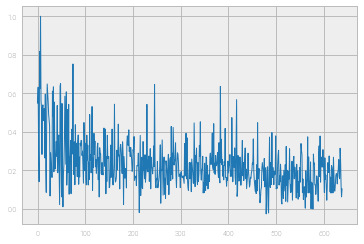

In [86]:
which_sentence = 6
print(list_correlations_df[which_sentence])
plt.plot(correlations_df.loc[list_correlations_df[which_sentence],:].values)

In [131]:
noun_sentence_df_20_reindex = noun_sentence_df_20.set_index('noun_sentence_corrections')

In [104]:
test_df

noun_sentence_corrections,new bathrooms,new vanities,quartz countertops,top bottom,new kitchen cabinets,new kitchen,new cabinets,new windows,new driveway,subway tile backsplash,...,great value,short sale foreclosure,large home,private remarks,great opportunity,quick sale,short sale,great investment property,great investment opportunity,needs tender loving care
noun_sentence_corrections,,,,,,,,,,,,,,,,,,,,,
new bathrooms,1.000000,0.590982,0.135705,0.102463,0.451565,0.599612,0.549633,0.478538,0.446852,0.282209,...,0.134572,0.121494,0.243616,0.173221,0.205447,0.284246,0.190221,0.040568,0.073820,0.025418
new vanities,0.590982,1.000000,0.136238,0.200501,0.417032,0.578911,0.631558,0.505135,0.488338,0.124328,...,0.244444,0.150134,0.256693,0.142263,0.251338,0.269713,0.227607,0.074415,0.140209,0.091845
quartz countertops,0.135705,0.136238,1.000000,0.106559,0.381654,0.249013,0.304748,0.150571,0.219898,0.348028,...,0.008422,0.122790,0.143048,-0.042067,0.027060,0.097559,0.063355,0.111687,0.081435,0.178230
top bottom,0.102463,0.200501,0.106559,1.000000,0.099901,0.167759,0.141665,0.109949,0.138972,0.131350,...,0.210635,0.105647,0.358653,0.148216,0.081773,0.230263,0.209441,0.104573,0.095694,0.120745
new kitchen cabinets,0.451565,0.417032,0.381654,0.099901,1.000000,0.756371,0.816629,0.392157,0.450471,0.423458,...,0.116761,0.211597,0.194274,0.078456,0.068458,0.224576,0.191850,0.148849,0.041638,0.064804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
quick sale,0.284246,0.269713,0.097559,0.230263,0.224576,0.265469,0.315233,0.318442,0.353605,0.099706,...,0.382405,0.425293,0.333358,0.215735,0.391686,1.000000,0.612635,0.224054,0.256960,0.108490
short sale,0.190221,0.227607,0.063355,0.209441,0.191850,0.204232,0.246531,0.233890,0.274812,0.076319,...,0.258297,0.843862,0.312843,0.248084,0.220414,0.612635,1.000000,0.271750,0.190678,0.094276
great investment property,0.040568,0.074415,0.111687,0.104573,0.148849,0.163727,0.122736,0.153263,0.203115,0.080845,...,0.477144,0.278398,0.331347,0.042090,0.412551,0.224054,0.271750,1.000000,0.701701,0.162563


In [133]:
skill_group = {}
test_df = correlations_df.copy('deep')

while len(test_df) > 0:
    idd = test_df.index[0]
    print(idd)
    group = list(np.array(test_df.loc[idd][test_df.loc[idd]>0.8].index))
    print(noun_sentence_df_20_reindex.loc[group,'AVM_Error_Average'])
    skill_group[group[0]] =group
    test_df = test_df.drop(labels = group, axis = 1)
    test_df = test_df.drop(labels = group, axis = 0)

new bathrooms
noun_sentence_corrections
new bathrooms    0.130694
Name: AVM_Error_Average, dtype: float64
new vanities
noun_sentence_corrections
new vanities    0.108594
Name: AVM_Error_Average, dtype: float64
quartz countertops
noun_sentence_corrections
quartz countertops    0.145667
quartz countertops    0.106524
Name: AVM_Error_Average, dtype: float64
top bottom
noun_sentence_corrections
top bottom    0.102521
Name: AVM_Error_Average, dtype: float64
new kitchen cabinets
noun_sentence_corrections
new kitchen cabinets    0.090160
new cabinets            0.087397
kitchen cabinets        0.035876
Name: AVM_Error_Average, dtype: float64
new kitchen
noun_sentence_corrections
new kitchen               0.089538
new kitchen appliances    0.032865
Name: AVM_Error_Average, dtype: float64
new windows
noun_sentence_corrections
new windows    0.075196
Name: AVM_Error_Average, dtype: float64
new driveway
noun_sentence_corrections
new driveway    0.074821
Name: AVM_Error_Average, dtype: float64
sub

kitchen bathrooms
noun_sentence_corrections
kitchen bathrooms    0.038657
Name: AVM_Error_Average, dtype: float64
new carpet bedrooms
noun_sentence_corrections
new carpet bedrooms    0.042893
new carpet bedrooms    0.037430
new carpet bedrooms    0.035208
Name: AVM_Error_Average, dtype: float64
interior exterior
noun_sentence_corrections
interior exterior    0.036932
Name: AVM_Error_Average, dtype: float64
entire home
noun_sentence_corrections
entire home     0.036716
entire house    0.034446
Name: AVM_Error_Average, dtype: float64
wine cellar
noun_sentence_corrections
wine cellar    0.035274
Name: AVM_Error_Average, dtype: float64
number
noun_sentence_corrections
number    0.059825
number    0.046388
number    0.043740
number    0.043079
number    0.034995
number    0.018858
number   -0.017484
number   -0.017495
number   -0.018297
number   -0.021475
number   -0.022568
number   -0.023632
number   -0.023742
number   -0.025104
number   -0.025506
number   -0.032925
number   -0.033948
numb

butlers pantry
noun_sentence_corrections
butlers pantry    0.014844
Name: AVM_Error_Average, dtype: float64
gourmet kitchen
noun_sentence_corrections
gourmet kitchen    0.014762
gourmet kitchen    0.012554
gourmet kitchen    0.010398
gourmet kitchen   -0.036936
Name: AVM_Error_Average, dtype: float64
smooth ceilings
noun_sentence_corrections
smooth ceilings    0.014761
Name: AVM_Error_Average, dtype: float64
fresh paint
noun_sentence_corrections
fresh paint             0.014749
fresh interior paint    0.014300
fresh interior paint   -0.017824
Name: AVM_Error_Average, dtype: float64
irrigation system
noun_sentence_corrections
irrigation system    0.015466
irrigation system    0.014666
Name: AVM_Error_Average, dtype: float64
private entrance
noun_sentence_corrections
private entrance    0.014602
Name: AVM_Error_Average, dtype: float64
tile backsplash
noun_sentence_corrections
tile backsplash    0.054172
tile backsplash    0.034811
tile backsplash    0.014494
Name: AVM_Error_Average, dtyp

noun_sentence_corrections
digitdigit    0.075378
digitdigit    0.064485
digitdigit    0.061940
digitdigit    0.054929
digitdigit    0.033215
                ...   
digitdigit   -0.002829
digitdigit   -0.003928
digitdigit   -0.004297
digitdigit   -0.029450
digitdigit   -0.031217
Name: AVM_Error_Average, Length: 70, dtype: float64
model home
noun_sentence_corrections
model home    0.007492
Name: AVM_Error_Average, dtype: float64
private baths
noun_sentence_corrections
private baths    0.007468
private bath     0.000441
private bath    -0.007059
Name: AVM_Error_Average, dtype: float64
entire main level
noun_sentence_corrections
entire main level    0.007265
entire main level   -0.003528
Name: AVM_Error_Average, dtype: float64
entry foyer
noun_sentence_corrections
entry foyer       0.007224
foyer entrance   -0.005869
Name: AVM_Error_Average, dtype: float64
jacuzzi tub
noun_sentence_corrections
jacuzzi tub      0.007164
whirlpool tub   -0.009504
Name: AVM_Error_Average, dtype: float64
open 

noun_sentence_corrections
double vanity    0.022841
double vanity    0.000731
double vanity   -0.006177
double vanity    0.022841
double vanity    0.000731
double vanity   -0.006177
Name: AVM_Error_Average, dtype: float64
guest bedrooms
noun_sentence_corrections
guest bedrooms    0.032836
guest bedrooms    0.000629
guest bedrooms   -0.000675
guest room       -0.001764
guest room       -0.004255
guest bedroom     0.046425
guest bedroom    -0.001121
guest bedroom    -0.006240
guest bedroom    -0.011108
Name: AVM_Error_Average, dtype: float64
cathedral ceilings
noun_sentence_corrections
cathedral ceilings    0.000515
Name: AVM_Error_Average, dtype: float64
charming home
noun_sentence_corrections
charming home    0.000419
Name: AVM_Error_Average, dtype: float64
spacious master
noun_sentence_corrections
spacious master    0.001955
spacious master    0.000182
Name: AVM_Error_Average, dtype: float64
open great room
noun_sentence_corrections
open great room    0.004043
open great room    0.000

noun_sentence_corrections
secondary bedrooms    0.001153
secondary bedrooms   -0.003751
secondary bedrooms   -0.006926
secondary bedrooms    0.001153
secondary bedrooms   -0.003751
secondary bedrooms   -0.006926
Name: AVM_Error_Average, dtype: float64
upstairs bedrooms
noun_sentence_corrections
upstairs bedrooms    0.013849
upstairs bedrooms   -0.003897
upstairs bedrooms   -0.012328
Name: AVM_Error_Average, dtype: float64
upstairs loft
noun_sentence_corrections
upstairs loft   -0.003951
Name: AVM_Error_Average, dtype: float64
open kitchen
noun_sentence_corrections
open kitchen    0.049100
open kitchen   -0.003983
Name: AVM_Error_Average, dtype: float64
digit digitdigit
noun_sentence_corrections
digit digitdigit    0.014969
digit digitdigit   -0.004075
digit digit        -0.008872
Name: AVM_Error_Average, dtype: float64
movein condition
noun_sentence_corrections
movein condition   -0.004094
Name: AVM_Error_Average, dtype: float64
secondary bedroom
noun_sentence_corrections
secondary bed

Name: AVM_Error_Average, dtype: float64
jill bath
noun_sentence_corrections
jill bath   -0.00932
Name: AVM_Error_Average, dtype: float64
new vinyl
noun_sentence_corrections
new vinyl   -0.009398
Name: AVM_Error_Average, dtype: float64
mature trees
noun_sentence_corrections
mature trees   -0.009478
Name: AVM_Error_Average, dtype: float64
bath home
noun_sentence_corrections
bath home   -0.009604
Name: AVM_Error_Average, dtype: float64
quiet cul
noun_sentence_corrections
quiet cul   -0.009739
Name: AVM_Error_Average, dtype: float64
digitbddigitba
noun_sentence_corrections
digitbddigitba   -0.009758
Name: AVM_Error_Average, dtype: float64
large corner lot
noun_sentence_corrections
large corner lot   -0.009903
large corner lot   -0.027995
Name: AVM_Error_Average, dtype: float64
room fireplace
noun_sentence_corrections
room fireplace          -0.003023
room fireplace          -0.009394
room fireplace          -0.009986
room fireplace          -0.039574
room with fireplace     -0.009944
room 

large breakfast area
noun_sentence_corrections
large breakfast area    0.012159
large breakfast area   -0.016545
Name: AVM_Error_Average, dtype: float64
digitbr
noun_sentence_corrections
digitbr   -0.011464
digitbr   -0.017085
digitbr   -0.025558
Name: AVM_Error_Average, dtype: float64
large master bath
noun_sentence_corrections
large master bath   -0.017098
large master bath   -0.029604
large master bath   -0.030263
Name: AVM_Error_Average, dtype: float64
number bedroom number bathroom
noun_sentence_corrections
number bedroom number bathroom    0.083303
number bedroom number bathroom    0.045025
number bedroom number bathroom    0.042060
number bedroom number bathroom   -0.017217
number bedroom number bathroom   -0.017858
number bedroom number bathroom   -0.018339
number bedroom number bathroom   -0.019543
number bedroom number bathroom   -0.019752
number bedroom number bathroom   -0.023247
number bedroom number bathroom   -0.023934
number bedroom number bathroom   -0.030796
number be

In [132]:
noun_sentence_df_20_reindex.loc[group,'AVM_Error_Average']

noun_sentence_corrections
new bathrooms    0.130694
Name: AVM_Error_Average, dtype: float64

In [130]:
noun_sentence_df_20

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,Listing_Error_Indicators,noun_sentence_embeddings,noun_sentence_vaderpolarity,noun_sentence_no_punct,noun_sentence_corrections,not_words,noun_sentence_corrections_embeddings
63607,studs renovation,31,9.744215,"[0.4103665640631011, 0.41728319999999997, 0.49...",-0.735297,"[0.0, 0.00028571428571428574, 0.06693333333333...","[197894660, 250604412, 249157137, 222400238, 2...",0.314330,-0.023719,"[0.31432952538041775, 0.04068285195361636, -0....","[-0.02371925683439437, 0.0020194508549551816, ...","[0.052691612, 0.03693112, -0.049397767, -0.008...","[0.0, 1.0, 0.0, 0.0]",studs renovation,studs renovation,,"[0.052691612, 0.03693112, -0.049397767, -0.008..."
83996,shower surrounds,28,7.905244,"[0.4387752777777778, 0.17622340350877197, 0.27...",-1.544048,"[-0.055, -0.08421052631578947, -0.019078947368...","[132872201, 6731906, 4232620, 5329671, 1258112...",0.282330,-0.055145,"[0.28233013942341034, 0.0424224129690018, -0.4...","[-0.05514457781159121, 0.0024243273137415197, ...","[-0.014650434, 0.07090296, 0.0504117, 0.011439...","[0.0, 1.0, 0.0, 0.0]",shower surrounds,shower surrounds,,"[-0.014650434, 0.07090296, 0.0504117, 0.011439..."
92676,lee+white development,28,7.584127,"[0.44474872174879587, 0.5014364032697548, 0.09...",-2.173541,"[0.0, -0.00790190735694823, -0.029117647058823...","[211308616, 127087241, 133213133, 171564991, 1...",0.270862,-0.077626,"[0.2708616696841231, 0.06026944254415941, -0.7...","[-0.07762644975555874, 0.01239395576734469, -2...","[0.04612677, 0.00079587736, 0.043401964, -0.04...","[0.0, 1.0, 0.0, 0.0]",leewhite development,leewhite development,leewhite,"[0.03309278, 0.021012176, 0.017111761, -0.0294..."
113989,monday night brewery,21,5.171616,"[-0.02238924855491331, 0.5014364032697548, -0....",-0.625781,"[-0.06907514450867051, -0.00790190735694823, 0...","[200858826, 127087241, 172189751, 133213133, 1...",0.246267,-0.029799,"[0.2462674300702824, 0.09033614418445898, -1.5...","[-0.029799101674654667, 0.004036221684828119, ...","[0.060026523, -0.031776395, -0.07081793, -0.06...","[0.0, 1.0, 0.0, 0.0]",monday night brewery,monday night brewery,monday,"[0.060026523, -0.031776395, -0.07081793, -0.06..."
116777,gorgeous bungalow,24,5.846151,"[0.06999810457516331, 0.4551995135135135, 0.29...",-0.840031,"[0.05555555555555555, -0.08054054054054054, -0...","[142728061, 210231641, 209961967, 152933557, 1...",0.243590,-0.035001,"[0.24358962556385214, 0.045847676984274735, -0...","[-0.035001307484190024, 0.006301288135261846, ...","[-0.020439927, -0.02788046, -0.017497879, 0.00...","[0.0, 0.2, 0.8, 0.6124]",gorgeous bungalow,gorgeous bungalow,,"[-0.020439927, -0.02788046, -0.017497879, 0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825189,utilities inspections,106,-52.553157,"[0.011213698630137103, -0.44224117647058825, 0...",-0.803344,"[0.043835616438356165, -0.20452488687782805, -...","[132883912, 4158664, 3640049, 140201011, 13941...",-0.495785,-0.007579,"[-0.4957845039683316, 0.2072645364563917, -0.0...","[-0.00757871387996991, 0.03244321830158484, -0...","[-0.011067669, -0.0022810258, 0.023981124, -0....","[0.0, 1.0, 0.0, 0.0]",utilities inspections,utilities inspections,,"[-0.011067669, -0.0022810258, 0.023981124, -0...."
1825484,available inspections,25,-12.459462,"[-0.7051311666666666, -0.16786450000000008, -0...",0.214399,"[0.0016666666666666668, 0.125, 0.0, -0.149, 0....","[150636167, 173343008, 176532508, 187777456, 2...",-0.498378,0.008576,"[-0.4983784993571633, 0.08701769936855712, 0.2...","[0.008575964698432173, 0.019177693420631702, -...","[-0.029419353, 0.009323144, 0.0018775914, 0.05...","[0.0, 1.0, 0.0, 0.0]",available inspections,available inspections,,"[-0.029419353, 0.009323144, 0.0018775914, 0.05..."
1826737,good potential,46,-23.538884,"[0.2837384191176471, -0.5405605, -0.3893973288...",-3.272146,"[-0.0560661

In [115]:
skill_group

{'new bathrooms': ['new bathrooms'],
 'new vanities': ['new vanities'],
 'quartz countertops': ['quartz countertops'],
 'top bottom': ['top bottom'],
 'new kitchen cabinets': ['new kitchen cabinets',
  'new cabinets',
  'kitchen cabinets'],
 'new kitchen': ['new kitchen', 'new kitchen appliances'],
 'new windows': ['new windows'],
 'new driveway': ['new driveway'],
 'subway tile backsplash': ['subway tile backsplash'],
 'new toilets': ['new toilets'],
 'new gutters': ['new gutters'],
 'new deck': ['new deck'],
 'new stainless steel appliances': ['new stainless steel appliances',
  'new stainless steel appliances'],
 'efficient windows': ['efficient windows'],
 'new floors': ['new floors'],
 'new heating, ventilation, and air conditioning': ['new heating, ventilation, and air conditioning',
  'new heating, ventilation, and air conditioning system',
  'heating, ventilation, and air conditioning system',
  'heating, ventilation, and air conditioning systems'],
 'private oasis': ['private 

In [116]:
len(skill_group)

459

In [110]:
test_df = correlations_df.copy('deep')

In [112]:
idd = test_df.index[0]
print(idd)
group = list(np.array(test_df.loc[idd][test_df.loc[idd]>0.8].index))
skill_group[group[0]] =group
test_df = test_df.drop(labels = group, axis = 1)
test_df = test_df.drop(labels = group, axis = 0)

new bathrooms


In [113]:
test_df.index[0]

'new vanities'

In [103]:
skill_group

{'new bathrooms': ['new bathrooms']}

In [99]:
group

array(['new bathrooms'], dtype=object)

In [ ]:
    group = skill_freq.iloc[np.array(Corr.loc[idd][np.isfinite(Corr.loc[idd])].index)]
    skill_group[i] = group.SkillName.values
    Distinct = group.SkillName.index.isin(test_df.index)
    test_df.drop(group.SkillName.index[Distinct], inplace = True)

In [ ]:
for wd in noun_sentence_df_20.not_words.unique():
    print(len(wd),wd)

In [26]:
for wd in noun_sentence_df_20.not_words.unique():
    print(len(wd),wd)

0 
8 leewhite
6 monday
6 mozley
10 digitboard
11 mechanicals
7 decatur
7 samsung
8 beltline
7 drywall
9 perkerson
3 usb
12 mercedesbenz
9 shoreline
9 sheetrock
3 amp
10 digitstall
19 carrera countertops
11 countertops
3 bbq
7 carrera
6 walkin
17 westside bestside
16 , , conditioning
4 krog
13 mercedes benz
3 pex
6 allnew
8 kirkwood
5 eatin
7 highend
4 coan
8 wgranite
7 porsche
9 softclose
9 jefferson
5 marta
5 adair
6 stoney
10 pittsburgh
6 wlarge
9 digitslip
9 lakefront
7 atlanta
9 floorplan
10 countertop
9 saltwater
6 clarke
4 mini
7 spalike
22 countertops backsplash
12 wisland wbar
4 lowe
7 pestban
12 windowsdoors
8 builtins
5 tyler
16 atlanta beltline
6 wcreek
6 redone
8 oakhurst
9 insideout
4 jenn
10 digitdigit
5 ctops
6 lanier
8 backyard
7 carrara
10 backsplash
22 backsplash countertops
7 ensuite
7 mudroom
6 french
6 awaits
6 wvalet
10 wwaterfall
1 -
7 wcustom
9 digitdoor
15 energyefficient
7 thruout
4 betz
12 topoftheline
10 washington
5 mckoy
10 wstainless
17 saltwater poolspa


9 pm sunday
5 amish
18 alpharetta roswell
4 bdba
13 eatin wpantry
9 br walkin
6 dodgen
8 americas
26 digitdigitdigitidigitdigit
16 cresswind lanier
31 digitdigit digitdigitdigitdigit
13 digitdigitday
13 - openconcept
17 gwinnett gwinnett
8 prepaids
14 martha stewart
11 ee robinson
10 buffington
9 cdc emory
50 digitdigitdigitdigitdigitdigitdigitdigitdigitdigit
6 harlan
16 eatin wbreakfast
9 southlake
9 chestatee
8 clos ein
11 jeh atlanta
8 alatoona
5 owned
9 northlake
7 walmart
12 george tomas
7 josephs
9 hawthorne
17 peachtree fayette
11 eatin bfast
10 lrdr combo
4 orme
9 mcpherson
9 woodstock
10 rivermoore
10 bdrmsdigit
17 digitdigitdigitmo
8 hometown
6 haynes
9 stillwood
5 bitsy
13 qualifies fha
15 bedrmdigitdigit
7 brayson
3 pvc
23 digitpm digitdigitdigit
10 zillow inc
12 prequalified
8 craftman
7 chooses
18 abernathy greenway
4 rbid
20 digitdigitdigitmonth
13 atlanta macon
6 friday
8 occupied
7 tuesday
4 conv
6 fha va
6 alcovy
10 forclosure
36 digitdigitdigit digitdigitdigitdigit
1

In [25]:
len(noun_sentence_df_20.not_words.unique())

1486

In [ ]:
len(words)

In [ ]:
#to_replace = ['cdh']
#replace_with = ['cdh']
#for wd in noun_sentence_df_20.not_words.unique():
#        to_replace.append(wd)
#        replace_with.append(wd)

In [ ]:
for wd in noun_sentence_df_20.not_words.unique():
    print(len(wd),wd)
    print(noun_sentence_df_20[noun_sentence_df_20['not_words']==wd]\
              ['noun_sentence'])

In [ ]:
to_replace = []
replace_with = []
for wd in noun_sentence_df_20.not_words.unique():
    print(len(wd),wd)
    print(noun_sentence_df_20[noun_sentence_df_20['not_words']==wd]\
              ['noun_sentence'])
    is_english = input("Is english? 1-yes, 2-no")
    if is_english!='1':
        to_replace.append(wd)
        word_replacement = input("Replace with:")
        replace_with.append(word_replacement)


In [ ]:
list_to_replace

In [ ]:
list_to_change

In [ ]:

for wd in to_replace:
    list_to_change.append(wd)
    
for wd in replace_with:
    list_to_replace.append(wd)
        

In [ ]:
replacement_dictionary = dict(zip(list_to_change, list_to_replace))



In [ ]:
import json
# create json object from dictionary
json = json.dumps(replacement_dictionary, indent = 4)
f = open("replacement_dictionary_2.json","w")
f.write(json)
f.close()

In [ ]:
#john willis
#carpet brs